Итоговый проект
## КОСМИЧЕСКИЙ ТИТАНИК
## Spaceship Titanic

#### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the _Spaceship Titanic_'s collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

#### File and Data Field Descriptions

* __train.csv__ - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * ``PassengerId`` - A unique Id for each passenger. Each Id takes the form ``gggg_pp`` where ``gggg`` indicates a group the passenger is travelling with and ``pp`` is their number within the group. People in a group are often family members, but not always.
    * ``HomePlanet`` - The planet the passenger departed from, typically their planet of permanent residence.
    * ``CryoSleep`` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * ``Cabin`` - The cabin number where the passenger is staying. Takes the form ``deck/num/side``, where ``side`` can be either ``P`` for _Port_ or ``S`` for _Starboard_.
    * ``Destination`` - The planet the passenger will be debarking to.
    * ``Age`` - The age of the passenger.
    * ``VIP`` - Whether the passenger has paid for special VIP service during the voyage.
    * ``RoomService``, ``FoodCourt``, ``ShoppingMall``, ``Spa``, ``VRDeck`` - Amount the passenger has billed at each of the _Spaceship Titanic_'s many luxury amenities.
    * ``Name`` - The first and last names of the passenger.
    * ``Transported`` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* __test.csv__ - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of ``Transported`` for the passengers in this set. 
* __sample_submission.csv__ - A submission file in the correct format.
    * ``PassengerId`` - Id for each passenger in the test set.
    * ``Transported`` - The target. For each passenger, predict either ``True`` or ``False``.

#### Открытие датасета

In [1]:
import pandas as pd

Отключение ограничений вывода количества строк и столбцов:

In [2]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

Развед. анализ данных будет проводиться для __train.csv__

In [3]:
# const
data_patch = "data/Spaceship_Titanic/train.csv"

In [4]:
# data
df = pd.read_csv(data_patch)

#### Обзор датасета

Информация о наборе данных:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Описательная статистика численных столбцов:

In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Категориальные признаки:

In [7]:
df.describe(include=['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [8]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [10]:
df["Cabin"].nunique()

6560

In [11]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [12]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [13]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Фактически значения колонок ``CryoSleep`` и ``VIP`` являются бинарными, хотя определены как категориальные

#### Пропуски

Количество пропусков по столбцам:

In [14]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Доля пропусков по столбцам:

In [15]:
df.isnull().sum() / df.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

Доля пропусков менее 3%. Общая сумма строк с пропусками:

In [16]:
df.shape[0] - df.dropna().shape[0]

2087

2087 строк из 8693 имеют пропуски. В дальнейшем это нужно будет учитывать.

#### Корреляции и зависимость целевой переменной

In [17]:
import seaborn as sns

Тепловая карта корреляций численных и бинарных столбцов:

<AxesSubplot:>

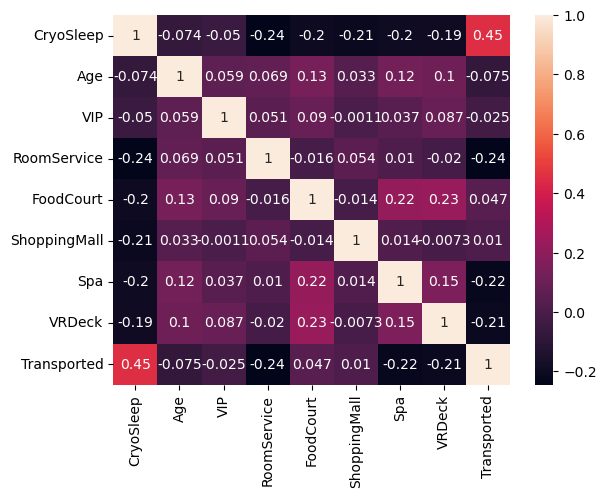

In [18]:
#df = df.astype({"CryoSleep": 'bool', "VIP": 'bool'})  # бинаризация NaN => True
sns.heatmap(
    df.astype({"CryoSleep": 'bool', "VIP": 'bool'}).loc[:, ["CryoSleep", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]].corr(),
    annot=True
)

Целевая переменная ``Transported`` имеет наиболее высокую корреляцию (0.45) с переменной ``CryoSleep``. Все остальные корреляции между переменными незначительны.

#### 1. Модель логистической регрессии

Выбор значений и заполнение пропусков в датасете:

In [90]:
df1 = df.drop(['PassengerId', 'Cabin', 'Name'],axis=1)#.dropna()  # выбор признаков для модели

In [91]:
df1 = pd.get_dummies(data=df1, dummy_na=True)  # бинариация категориальных признаков методом One-hot-кодирование

In [92]:
#df1 = df1.dropna()  # удаление оставшихся пропусков
df1 = df1.fillna(df1.mean())  # заполнение пропусков признаков float64 средними значениями

Обучение модели:

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = df1.drop('Transported', axis=1)
y = df1['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_std, y_train)

LogisticRegression()

Значения влияния весов каждого признака на целевую переменную:

In [94]:
df1_coefs = pd.DataFrame(data=clf.coef_, columns=X.columns).T
df1_coefs.columns = ['Coeffecient']
df1_coefs

,Coeffecient
Age,-0.124134
RoomService,-0.901672
FoodCourt,0.776559
ShoppingMall,0.333090
Spa,-1.935685
VRDeck,-2.021702
HomePlanet_Earth,-0.415456
HomePlanet_Europa,0.549984
HomePlanet_Mars,-0.054146
HomePlanet_nan,-0.052282


Метрики:

In [95]:
from sklearn.metrics import accuracy_score


# получаем предсказания (ответы) алгоритма
y_pred = clf.predict(X_test_std)
y_pred_train = clf.predict(X_train_std)

print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred)}')

Accuracy Train: 0.7863100373885533
Accuracy Test: 0.7883841288096607


In [96]:
from sklearn.metrics import precision_score, recall_score


print(f'Precision Train: {precision_score(y_train, y_pred_train)}')
print(f'Precision Test: {precision_score(y_test, y_pred)}\n')

print(f'Recall Train: {recall_score(y_train, y_pred_train)}')
print(f'Recall Test: {recall_score(y_test, y_pred)}')

Precision Train: 0.7809364548494984
Precision Test: 0.7879818594104309

Recall Train: 0.8001142204454598
Recall Test: 0.79337899543379


In [97]:
from sklearn.metrics import f1_score


print(f'F1 Train: {f1_score(y_train, y_pred_train)}')
print(f'F1 Test: {f1_score(y_test, y_pred)}')

F1 Train: 0.7904090267983075
F1 Test: 0.7906712172923777


In [98]:
from sklearn.metrics import roc_auc_score


y_pred_score = clf.predict_proba(X_test_std)
y_pred_train_score = clf.predict_proba(X_train_std)

print(f'ROC-AUC Train: {roc_auc_score(y_train, y_pred_train_score[:,1])}')
print(f'ROC-AUC Test: {roc_auc_score(y_test, y_pred_score[:,1])}')

ROC-AUC Train: 0.8699166194056962
ROC-AUC Test: 0.877324772350884
